# Chapter9 비지도학습
- ### 군집
    - 비슷한 샘플을 클러스터로 모은다.

- ### 이상치 탐지(outlier detection)
    - '정상'데이터가 어떻게 보이는지를 학습한 후 비정상 샘플을 감지하는데 사용한다.
- ### 밀도추정(density estimation)
    - 데이터셋 생성 혹률 고정(random process)의 확률밀도함수 pdf(probability density function)을 추정한다. 밀도 추정은 이상치 탐지에 널리 사용된다. 정상샘플이 이상치보다 훨씬 많을 것이기 때문에 밀도가 낮은 영역에 놓인 샘플이 이상치일 확률이 높기 때문이다.


In [3]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 군집
군집은 분류와 비슷해보이지만 비지도학습이라는 차이점이 있다. 앞에서 다룬 붓꽃 데이터셋은 각 샘플에 대해 어떤 품종인지 라벨링이 적용된 상태이므로 로지스틱 회귀, SVM, 랜덤포레스트 분류기같은 분류 알고리즘이 더 적합하다. 만약 이렇게 품종에 대한 라벨이 없다면 군집을 사용해야 할 것이다.
이런 군집은 여러 분야에 사용할 수 있는데
1. 고객분류
    - 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템을 만들 수 있다.
2. 이상치 탐지
    - 모든 클러스터와 친화성이 낮은 샘플은 이상치일 가능성이 높으므로 이러한 데이터가 들어온다면 이상치 탐지를 통해 부정거래감지 시스템 등에 사용할 수 있다.
3. 준지도 학습
    - 레이블된 샘플이 적다면 일단 군집화를 수행하고 레이블 된 샘플과 같은 군집에 있는 샘플에 해당 레이블을 전파하는 방법을 수행할 수 있다.

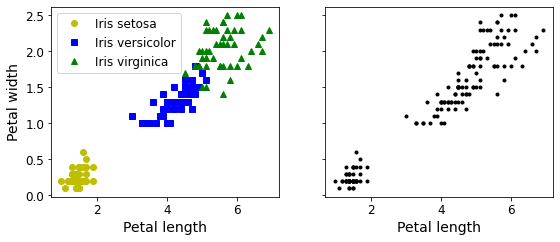

In [7]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

# k-mean clustering

In [1]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
#k-mean clustering을 위한 샘플 생성
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

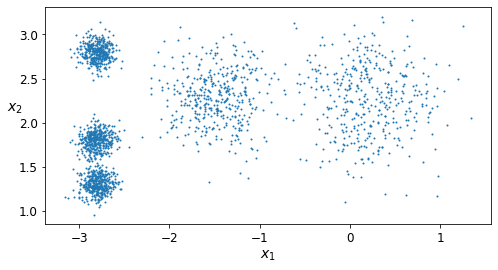

In [11]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [12]:
from sklearn.cluster import KMeans
k = 5 #그룹을 5개로 설정
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

In [13]:
#알고리즘이 찾은 센트로이드 다섯개를 확인해보자
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

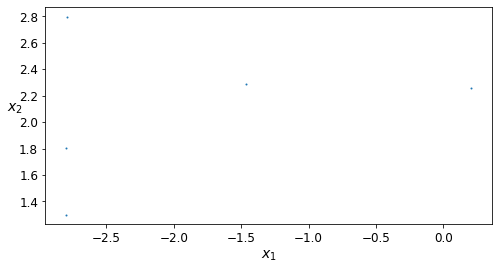

In [16]:
plt.figure(figsize=(8, 4))
plot_clusters(kmeans.cluster_centers_)
plt.show()
#다섯개의 점(콩알만하게 보이긴 하는데 크기 키우기 귀찮아서 그냥 확인만 했음)

## 하드군집 소프트군집
하드 군집은 각 샘플을 하나의 클러스터에 딱 할당하는 것이고 소프트 군집은 각 샘플마다 각 클러스터에 해당하는 점수를 부여하는 것
KMeans클래스의 transform() 메서드를 사용해서 샘플과 각 센트로이드 사이의 거리를 알 수 있다.

In [18]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

KMeans 방법은 초기 센트로이드를 어떻게 설정하느냐에 따라 결과가 달라질 수 있기 때문에 초기 센트로이드 선정과정이 중요하다. 두가지 방법이 존재하는데
첫번째, 다른 군집 알고리즘을 수행하는 등의 방법을 통해 좋은 센트로이드의 위치를 근사하게 알아낸 후 해당 센트로이드를 initial로 하여 알고리즘을 돌린다.
두번째, 랜덤하게 센트로이드를 초기화하여 알고리즘을 여러번 돌려봐서 가장 결과가 좋아보이는 것을 선택한다. 그렇다면 결과가 좋다는 것을 어떻게 선택할까? 이때 사용하는 성능 지표 이너셔(inertia)가 존재하고 이 값은 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱거리를 말한다.

In [20]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.59853725816836

In [21]:
kmeans.score(X)

-211.5985372581684

## 미니배치 k-mean
군집화를 수행할 때 한번에 모든 데이터를 사용하는 것이 아니라 각 iteration마다 미니배치를 사용해 센트로이드를 이동하는 방법이다. 일반적인 알고리즘에 비해 속도가 훨씬 빠르다는 장점이 있다.
sklearn.cluster의 MiniBatchKMeans를 사용하면 된다.

In [23]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters= 5 )
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

# 최적의 클러스터 갯수 찾기
앞의 예시처럼 샘플들이 눈으로 봐도 딱 몇개의 클러스터로 설정하면 좋겠다 라는 데이터가 아니라 엄청 복잡해보이는 데이터라면 클러스터를 몇개로 설정해야 할까?
이너셔가 가장 적은 경우를 선택할까? 답이 아니다. 이너셔는 k의 갯수가 증가할수록 작아질 수 밖에 없기 때문이다. 따라서 실루엣 점수(silhouette score)를 사용한다.

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)


0.655517642572828

# 군집을 사용한 이미지 분할
보통 색깔이 있는 이미지는 (이미지 높이, 넓이, 색상차원(rgb의 경우 3))의 형태의 데이터다.

In [29]:
import os
import urllib.request
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x11f3d24f0>)

In [30]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [31]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [32]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

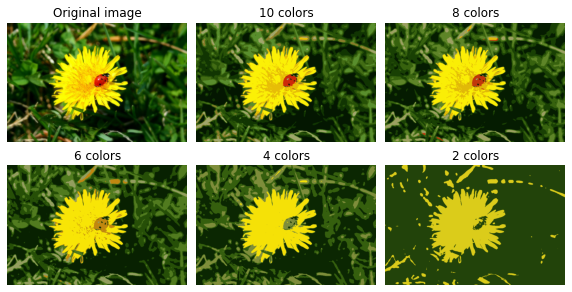

In [34]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

# 군집을 사용한 전처리

In [35]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [36]:
#로지스틱 회귀를 이용한 분류를 수행하고 테스트셋에서 정확도를 확인한다.
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

> 이제 그냥 회귀를 수행하기 전에 kmean을 사용해 전처리를 수행하고 그 다음 로지스틱회귀를 실시하는 파이프라인을 만들어 정확도를 측정해본다. k의 갯수는 숫자가 0~9이므로 10으로 설정하는것이 타당해보이지만 사람마다 글씨를 쓰는 방식이 다르므로 50개정도로 크게 잡는 것이 좋을 것이라고 책에서 말한다.

In [37]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

In [38]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

오차가 꽤 크게 줄었음을 확인할 수 있다.

# 군집을 사용한 준지도 학습
숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱회귀 모델을 훈련시켜보겠다.

In [39]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

정확도가 이전보다 훨씬 낮은 것을 확인할 수 있다. 성능을 올려보기 위해 군집을 사용해보겠다.
먼저 훈련세트를 50개의 클러스터로 군집화하고 각 클러스터에서 센트로이드에 가장 가까운 이미지(대표이미지)를 가져와서 우리가 수동으로 레이블을 매긴다.

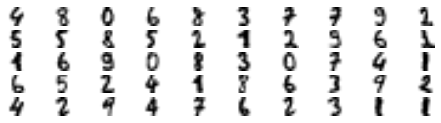

In [40]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [41]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [42]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [43]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

아까와 마찬가지로 50개의 샘플로만 모델을 훈련시켰지만 군집을 사용해  준지도 학습을 사용하니까 정확도가 훨씬 높아짐을 확인할 수 있었다.

# 레이블 전파
앞에서 한단계 더 나아가서 모든 샘플을 각각이 속한 클러스터의 대표 이미지와 같은 레이블을 할당하는 것을 레이블 전파라고 하고 이를 사용하면 정확도를 좀 더 끌어 올릴 수 있다.

# DBSCAN
각 샘플에서 작은 거리 입실론(e) 내에 샘플이 몇 개 있는지 센다. 이 지역의 샘플을 입실론-이웃이라고 부른다.
자기 자신을 포함해 e-이웃 내에 적어도 min_sample개의 샘플이 있다면 이를 핵심샘플(core instance)로 간주한다.
핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 또다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
핵심샘플도 아니고 이웃도 아닌 샘플은 이상치로 판단한다.

In [44]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [45]:
print(len(dbscan.core_sample_indices_))
print(dbscan.components_[:3])
print(np.unique(dbscan.labels_))

808
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]]
[-1  0  1  2  3  4  5  6]


In [46]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [48]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)


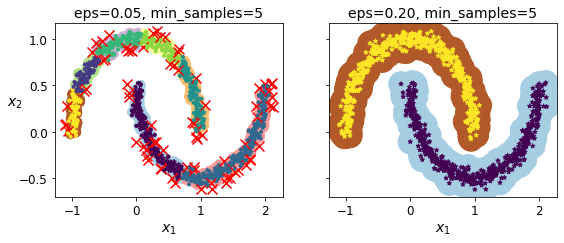

In [49]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

# 가우시안 혼합
가우시안 혼합 모델(Gaussian mixture model: GMM)은 샘플이 파라미터가 알려지지 않은 여러 개의 "혼합된" 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다. 즉, 클러스터의 모양이 꼭 원 말고 타원같은 것도 가능하다.

In [50]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [51]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [52]:
gm.weights_ #가중치

array([0.39025715, 0.40007391, 0.20966893])

In [53]:
gm.means_ #평균

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [54]:
gm.covariances_ #공분산

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [55]:
gm.converged_ #수렴 여부

True

In [56]:
gm.n_iter_ #수렴까지 몇 번 반복했나?

4

In [57]:
gm.predict(X) #HARD

array([0, 0, 1, ..., 2, 2, 2])

In [58]:
gm.predict_proba(X) #SOFT

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

### 생성모델의 기능
가우시안 혼합모델은 생성모델(generative model)이다. 즉, 이 모델에서 새로운 샘플을 만들 수 있다.

In [59]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [60]:
y_new

array([0, 0, 1, 2, 2, 2])

# 이상치 탐지
outlier detection은 보통과 많이 다른 샘플을 감지하는 작업이다. 가우시안 모델은 이상치 탐지 방법에 밀도 임곗값을 사용한다. 만약 이를 4%라고 가정한다면 밀도가 낮은 지역에 있는 4%의 샘플을 이상치로 감지한다. 만약 거짓 양성이 너무 많다면(정상이지만 이상치로 판단한 경우가 많다) 임곗값을 낮춰야하고 거짓 양성이 너무 많다면(이상치 이지만 정상으로 판단한 경우가 많은 경우) 임곗값을 올려줘야한다. 즉, trade-off 관계이다.

In [61]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [62]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

NameError: name 'plot_centroids' is not defined

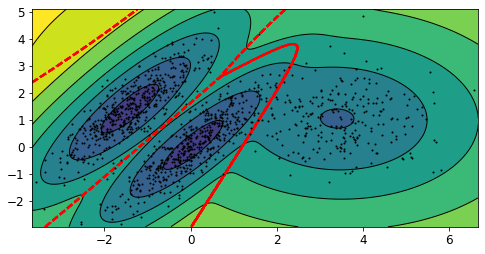

In [63]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

# 베이즈 가우시안 혼합 모델
최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture클래스를 사용할 수 있다. 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다.

In [64]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [65]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

NameError: name 'plot_centroids' is not defined

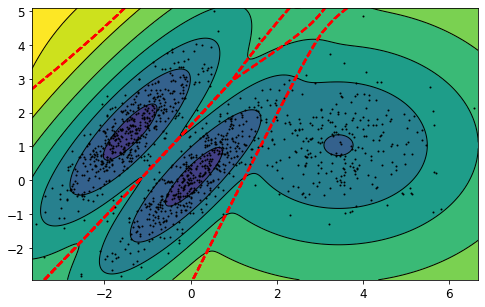

In [66]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()